In [1]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
events_data = pd.read_csv('datasets/df_concat6.csv')
events_data.head()

,Month,Area Affected,NERC Region,Event Type,Demand Loss (MW),Number of Customers Affected,Year,Date/Time Event Began,Date/Time Restoration,Event Duration (hours)
0,January,Washington,WECC,System Operations,0.0,NaN,2019,2019-01-05 13:19:00,2019-01-05 15:07:00,1.80
1,January,Washington,WECC,Severe Weather,230.0,230000.0,2019,2019-01-06 03:00:00,2019-01-09 07:00:00,4.00
2,January,California,WECC,Severe Weather,300.0,90382.0,2019,2019-01-06 17:56:00,2019-01-06 21:52:00,3.93
3,January,Washington,WECC,Severe Weather,NaN,230000.0,2019,2019-01-06 01:00:00,2019-01-06 12:00:00,11.00
4,January,Michigan,RF,System Operations,0.0,0.0,2019,2019-01-07 20:57:00,2019-01-07 21:32:00,0.58


### How many electric disturbances occurred in the U.S. from 2019 to 2022?

In [3]:
print(f'{events_data.shape[0]} events were recorded.')

1438 events were recorded.


### What was the number of events per year?

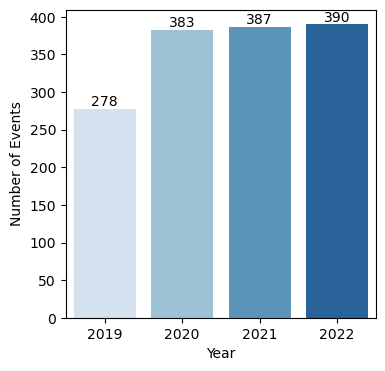

In [21]:
# creating a list with number of events per year
number_events_year = []

# range of years
years = range(2019, 2023, 1)

# filtering the number of events by year
for i in years:
    result = events_data.query('Year == @i')
    number_events_year.append(result.shape[0])

# creating a dataframe with number of events and year variables
df = pd.DataFrame({'Number of Events':number_events_year,'Year':years})

# plotting 
fig = plt.subplots(figsize=(4,4))
ax = sns.barplot(data = df, x='Year', y='Number of Events', palette='Blues')
ax.bar_label(ax.containers[0])# this line shows the values
plt.show()

### What was the number of electric disturbances by month each year?

In [20]:
#each_year = events_data.groupby(['Year']).count()
events_each_month = events_data.groupby(['Year','Month'], as_index=False)['Area Affected'].count()

events_each_month.rename(columns={'Area Affected':'Number of Events'}, inplace=True)

events_each_month.head()

,Year,Month,Number of Events
0,2019,April,27
1,2019,August,31
2,2019,December,15
3,2019,February,25
4,2019,January,26


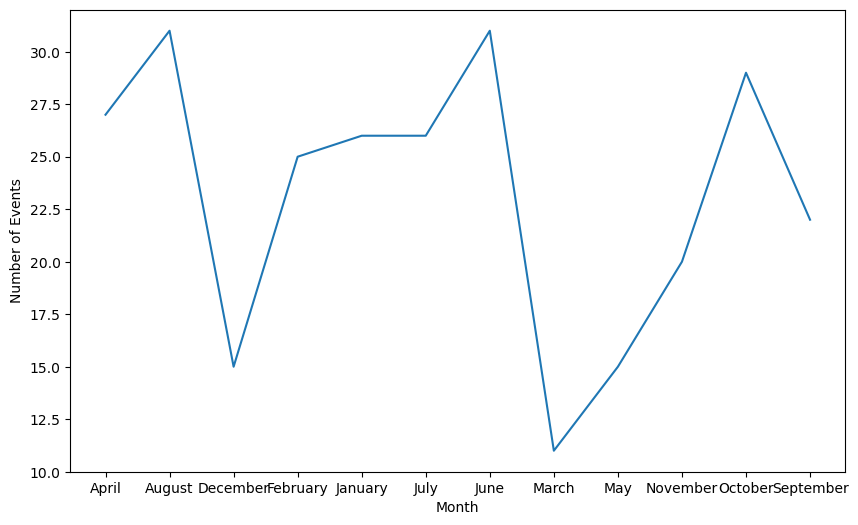

In [18]:
df_2019 = events_each_month.loc[events_each_month.loc[:,'Year'] == 2019,['Number of Events','Month']]
fig = plt.subplots(figsize=(10,6))
sns.lineplot(data=df_2019, x='Month', y= 'Number of Events', markers=True)
plt.show()

In [ ]:
# https://realpython.com/pandas-groupby/
# https://seaborn.pydata.org/generated/seaborn.lineplot.html
# https://www.datacamp.com/tutorial/python-seaborn-line-plot-tutorial